# Analysis of a TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this analysis I will be looking at the TMDb movie data. This dataset contains information on more than 10 000 movies. For example, information is provided on the popularity of each movie, the budget, genre, etc.
I will be investigating the relationship between popularity and genre, production company, and director. I will also look at the relationship between revenue, budget , and average vote.
By doing this I aim to answer the following questions:
1. Which genre of movie is most popular?
2. Which production company produces the most popular movies?
3. Which director is used in the most popular moves?
4. Is revenue directly proportional to budget?
5. Is revenue directly proportional to average vote?

In the code cell below I have imported the libraries and packages that I will be using throughout this analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


<a id='wrangling'></a>
## Data Wrangling

First off, I will load and take a look at the data available. I will look at the columns to see what information is provided and check the format in which data is presented in each column to see if any conversions or changes are necessary.
Overall I will inspect the cleanliness of the data, and identify where I want to make changes, trim, and clean the data to make it easier to work with.

### General Properties

First I will load the data to a dataframe and use methods to obtain more information on the datase, such as its size and the columns it contains.

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

The above code cells were executed to get a better idea of and feel for the data. Looking at the first few lines  allowed me to see what the row inputs look like as well as what the column headings are, in other words what information is given about each movie in the dataset. The number of movies can also be seen, as well as the number on NULL entries in each column by calling ".info". There are 10866 movies in this dataset. Mean, max and other qualities are found from ".describe", providing important statistical insight into the spread of the data. 


From this this brief look at the data, we can see that the following columns have missing values:
* imbd_id
* cost
* homepage
* director
* tagline
* keywords
* overview
* genres
* production_companies

I will start by removing from my dataframe all columns that I will not need to answer my questions in my analysis.
In the process some of the columns containing NULL values will be removed. I will then have to get rid of the remaining NULL values, either by replacing them, or by removing rows containing NULLs.

I will use budget_adj and revenue_adj rather than budget and revenue, since budget_adj and revenue_adj have been adjusted to show the budget and revenue in terms of 2010 dollars. I believe having a common base makes using this data better for comparisons. I will convert the values in budget_adj and revenue_adj from scientific notation to truncated decimal form, to improve clarity when viewing them.

### Data Cleaning and Trimming: Changes Required to Arrive at Final Dataset that was Analysed

Having looked at the data, I can start making changes that will help me end up with a dataset I can easily analyse.
To clean and trim the data I decided to do the following:
1. Remove all columns that I do not need in my analysis.
2. Remove NULLs from data
3. Remove duplicates
4. Change format of data in revenue_adj and budget_adj from scientific notation to decimal format
5. Extract first genre from genre column.
6. Extract first production company from production company column
7. Extract first director from director column
8. Remove outliers from popularity column

In [6]:
remove_cols=['id','imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','release_date','release_year','vote_count']
df1 = df.drop(remove_cols,axis=1)
df1.head(5)

,popularity,original_title,director,runtime,genres,production_companies,vote_average,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,1.747999e+08,1.385749e+09


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 764.1+ KB


Above I removed all columns that I do not need in my analysis. The colums used in this analysis are:

* popularity 
* original_title
* director (contains NULLS)
* runtime
* genres (contains NULLS)
* production_companies (contains NULLS)
* budget_adj
* revenue_adj
* vote_average

Three of these columns contain some NULL entries. Since these are all non-numerical entries, no mathematical imputation can be done. Therefore I will remove all rows containing NULL values.

In [8]:
sum(df1.apply(lambda x: sum(x.isnull().values), axis = 1)>0)  #counts number of rows containing 1 or more NULL entries

1059

In [9]:
df1.dropna(how='any', inplace=True);

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 9 columns):
popularity              9807 non-null float64
original_title          9807 non-null object
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
vote_average            9807 non-null float64
budget_adj              9807 non-null float64
revenue_adj             9807 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 766.2+ KB


In [11]:
sum(df1.apply(lambda x: sum(x.isnull().values), axis = 1)>0)  #counts number of rows containing 1 or more NULL entries

0

I checked how many rows contained one or more NULL entries - there were 1059. I then removed all these rows, checked again to see if any rows contained NULL entries, and found that all had been removed successfully.<br /> 
Next I will see if there are any duplicated rows.

In [12]:
sum(df1.duplicated())

1

In [13]:
df1[df1.duplicated()==True]

,popularity,original_title,director,runtime,genres,production_companies,vote_average,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,30000000.0,967000.0


In [14]:
df1[df1['original_title']=="TEKKEN"]

,popularity,original_title,director,runtime,genres,production_companies,vote_average,budget_adj,revenue_adj
2089,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,30000000.0,967000.0
2090,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,30000000.0,967000.0


In [15]:
df1.drop_duplicates(inplace=True)

In [16]:
sum(df1.duplicated())

0

One duplicated row was found for the movie " TEKKEN". The duplicated row was removed. <br />
The displayed format of the values in revenue_adj and budget_adj was looked at next.

In [17]:
df1[['budget_adj','revenue_adj']].head(5)

,budget_adj,revenue_adj
0,1.379999e+08,1.392446e+09
1,1.379999e+08,3.481613e+08
2,1.012000e+08,2.716190e+08
3,1.839999e+08,1.902723e+09
4,1.747999e+08,1.385749e+09


In [18]:
pd.options.display.float_format = '{:20,.2f}'.format

In [19]:
df1[['budget_adj','revenue_adj']].head(5)

,budget_adj,revenue_adj
0,"137,999,939.28","1,392,445,892.52"
1,"137,999,939.28","348,161,292.49"
2,"101,199,955.47","271,619,025.41"
3,"183,999,919.04","1,902,723,129.80"
4,"174,799,923.09","1,385,748,801.47"


I changed budget_adj and revenue_adj from scientific notation to decimal format, as can be seen in the first few rows of these columns above.

In [20]:
df1['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [21]:
df1['genres'].nunique()

1921

In [22]:
df1['production_companies'].unique()

array([ 'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ...,
       'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

In [23]:
df1['production_companies'].nunique()

7423

In [24]:

df1['genres1'] = df1['genres'].apply(lambda x:x.split('|')[0])
df1['production_company1'] = df1['production_companies'].apply(lambda x:x.split('|')[0])
df1['director1'] = df1['director'].apply(lambda x:x.split('|')[0])

As can be seen above, the "genres", "production_companies" and "director" column have many unique entries. I have decided to only look at the first entry in each row, assuming that the first entry is the most important and dominant classificaiton of the movie genre and director and production company involved in making the movie.<br/> Below I check to make sure that I managed to add three new columns to the dataset, providing the first movie genre, first production company and first director for each movie.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 12 columns):
popularity              9806 non-null float64
original_title          9806 non-null object
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
vote_average            9806 non-null float64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
genres1                 9806 non-null object
production_company1     9806 non-null object
director1               9806 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 995.9+ KB


In [26]:
df1.head()

,popularity,original_title,director,runtime,genres,production_companies,vote_average,budget_adj,revenue_adj,genres1,production_company1,director1
0,32.99,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.50,"137,999,939.28","1,392,445,892.52",Action,Universal Studios,Colin Trevorrow
1,28.42,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.10,"137,999,939.28","348,161,292.49",Action,Village Roadshow Pictures,George Miller
2,13.11,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.30,"101,199,955.47","271,619,025.41",Adventure,Summit Entertainment,Robert Schwentke
3,11.17,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.50,"183,999,919.04","1,902,723,129.80",Action,Lucasfilm,J.J. Abrams
4,9.34,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.30,"174,799,923.09","1,385,748,801.47",Action,Universal Pictures,James Wan


Next I want to determine the number of unique values in these new columns.

In [27]:
df1['genres1'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [28]:
df1['genres1'].nunique()

20

In [29]:
df1['production_company1'].unique()

array(['Universal Studios', 'Village Roadshow Pictures',
       'Summit Entertainment', ..., 'Bruce Brown Films',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

In [30]:
df1['production_company1'].nunique()

3041

In [31]:
df1['director1'].unique()

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
       'Alan Rafkin', 'Bruce Brown', 'Harold P. Warren'], dtype=object)

In [32]:
df1['director1'].nunique()

4320

As can be seen above, there are now fewer unique genres, production companies, and directors to work with.  
Next, I will use a histogram to take a look at the values in the popularity column. This should help me view the range and see if there are any outliers.

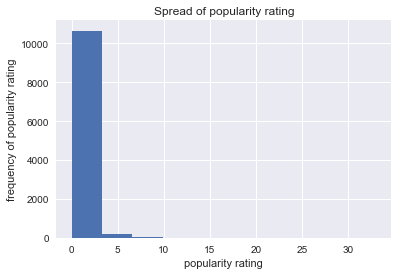

In [7]:
df['popularity'].hist()
plt.xlabel("popularity rating")
plt.ylabel("frequency of popularity rating")
plt.title("Spread of popularity rating");

From this chart it seems like there are some outliers in the popularity column. Lets look at the spread:

In [34]:
df1['popularity'].describe()

count               9,806.00
mean                    0.69
std                     1.04
min                     0.00
25%                     0.23
50%                     0.42
75%                     0.77
max                    32.99
Name: popularity, dtype: float64

From this one can see that the max value in this column is 32.99, however most of the values (75%) is less than 1. This suggests that 32 is a outlier. Lets look at the 85% quantile and find the percentage of values in the popularity column that is less than 1.

In [35]:
df1['popularity'].quantile(.85)

1.11487875

In [36]:
stats.percentileofscore(df1['popularity'],1)

82.123189883744658

Based on the investigation above one can see than approximately 82% of inputs in the populority column are less than or equal to 1.
This seems to indicate that the values larger than 1 may be outliers resulting from errors in the data capturing process.
What would make most sense, would be if popularity scores always ranged between zero and one - hence providing popularity as a proportion of 1 (100%). I will therefore remove all rows with popularity inputs higher than 1.

In [37]:
df1 = df1.query('popularity <=1')
df1.head()

,popularity,original_title,director,runtime,genres,production_companies,vote_average,budget_adj,revenue_adj,genres1,production_company1,director1
156,0.97,Queen of the Desert,Werner Herzog,128,Drama|History,Benaroya Pictures|H Films|Raslan Company of Am...,6.00,"13,799,993.93",0.00,Drama,Benaroya Pictures,Werner Herzog
157,0.96,Ricki and the Flash,Jonathan Demme,100,Comedy|Drama|Music,Columbia TriStar|Clinica Estetico|LStar Capital,5.50,"16,559,992.71","38,019,285.03",Comedy,Columbia TriStar,Jonathan Demme
158,0.95,Miss You Already,Catherine Hardwicke,112,Comedy|Drama|Romance,S Films|New Sparta Films,7.20,0.00,0.00,Comedy,S Films,Catherine Hardwicke
159,0.95,Kung Fury,David Sandberg,31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,7.70,"579,617.22",0.00,Action,Laser Unicorns,David Sandberg
160,0.95,The Perfect Guy,David M. Rosenthal,100,Drama|Thriller,Screen Gems,5.60,"11,039,995.14","55,451,294.76",Drama,Screen Gems,David M. Rosenthal


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8053 entries, 156 to 10865
Data columns (total 12 columns):
popularity              8053 non-null float64
original_title          8053 non-null object
director                8053 non-null object
runtime                 8053 non-null int64
genres                  8053 non-null object
production_companies    8053 non-null object
vote_average            8053 non-null float64
budget_adj              8053 non-null float64
revenue_adj             8053 non-null float64
genres1                 8053 non-null object
production_company1     8053 non-null object
director1               8053 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 817.9+ KB


In [39]:
df1.describe()

,popularity,runtime,vote_average,budget_adj,revenue_adj
count,"8,053.00","8,053.00","8,053.00","8,053.00","8,053.00"
mean,0.39,101.02,5.87,"11,027,712.97","21,237,648.30"
std,0.24,28.88,0.91,"22,604,466.33","60,678,053.41"
min,0.00,0.00,1.50,0.00,0.00
25%,0.20,90.00,5.30,0.00,0.00
50%,0.34,98.00,5.90,0.00,0.00
75%,0.54,110.00,6.50,"12,314,881.17","13,084,552.98"
max,1.00,877.00,8.70,"425,000,000.00","1,089,358,138.29"


I have now removed all popularity ratings larger than 1. The three preceding tables describe the dataset that I am now left with. 
At this point, all changes I believed were necessary to help me analyse this data and answer my questions have been carried out. The data is now ready to be explored in more detail.

<a id='eda'></a>
## Exploratory Data Analysis of the TMDb dataset

Using the cleaned and trimmed dataset, I will now use statistics and visualizations to try and answer the questions posed at the beginning of this report. 

###  Determinig the Most Popular Genre of Movie

First I would like to see which genre is the most popular. <br/>I will create a new dataframe showing the popularity of each genre as well as the count - number of times that genre occurs in the my original cleaned and trimmed dataset.

In [40]:
genres=df1.groupby('genres1')['revenue_adj'].count().reset_index()
genres.head(5)

,genres1,revenue_adj
0,Action,1138
1,Adventure,340
2,Animation,260
3,Comedy,1787
4,Crime,290


In [41]:
genres1=df1.groupby('genres1')['popularity'].mean().reset_index()
genres1.head(5)

,genres1,popularity
0,Action,0.41
1,Adventure,0.42
2,Animation,0.44
3,Comedy,0.39
4,Crime,0.42


In [42]:
df_genres = genres1.merge(genres, how='outer', left_index=True, right_index=True)
df_genres.drop(['genres1_y'],axis = 1,inplace=True)
df_genres.head(5)

,genres1_x,popularity,revenue_adj
0,Action,0.41,1138
1,Adventure,0.42,340
2,Animation,0.44,260
3,Comedy,0.39,1787
4,Crime,0.42,290


Having created this dataset, I want to rename the 'revenue_adj' column to 'count', which better describes it. 

In [43]:
df_genres.rename(columns={'revenue_adj': 'count'},inplace=True)

In [44]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
genres1_x     20 non-null object
popularity    20 non-null float64
count         20 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 640.0+ bytes


In [45]:
df_genres.describe()

,popularity,count
count,20.00,20.00
mean,0.38,402.65
std,0.07,568.28
min,0.20,6.00
25%,0.35,68.00
50%,0.39,155.50
75%,0.42,352.25
max,0.45,"1,930.00"


To get a reliable mean, I decided to only used rows where count is greater than the 25% count quartile which was found in the statistics above.

In [47]:
df_genres = df_genres[df_genres['count'] > 68]
df_genres.head(5)

,genres1_x,popularity,count
0,Action,0.41,1138
1,Adventure,0.42,340
2,Animation,0.44,260
3,Comedy,0.39,1787
4,Crime,0.42,290


I will now display this data in the form of a bar graph to visually compare the popularity of different genres.

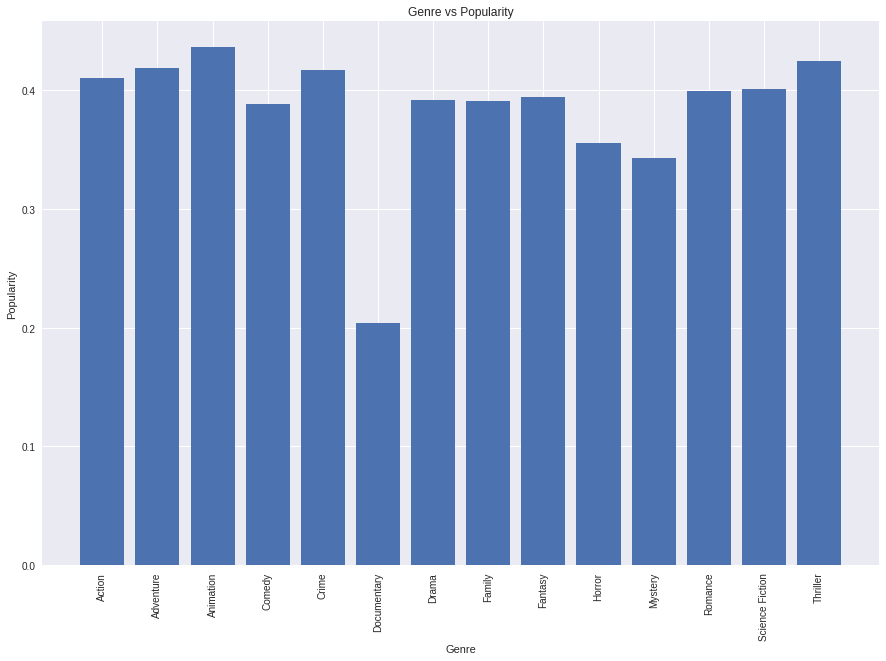

In [48]:
plt.figure(figsize=(15,10))
plt.title('Genre vs Popularity')
plt.xlabel('Genre')
plt.ylabel('Popularity') 
x=df_genres['genres1_x']
y=df_genres['popularity']
plt.xticks(np.arange(len(x)), x, rotation='vertical')
plt.bar(x,y);

From the chart it seems that animation, thriller, and adventure are the most popular genres. Lets used code to extract the top 10 genres and seen their exact mean popularity rating.

In [49]:
df_genres.sort_values('popularity',ascending= False).head(10)

,genres1_x,popularity,count
2,Animation,0.44,260
17,Thriller,0.42,389
1,Adventure,0.42,340
4,Crime,0.42,290
0,Action,0.41,1138
15,Science Fiction,0.40,133
14,Romance,0.40,122
8,Fantasy,0.39,178
6,Drama,0.39,1930
7,Family,0.39,101


As seen on the graph,the four most popular genres, according to this analysis, is Animation, Thriller, Adventure, and Crime.

###  Identifying the Production Company with the Most Popular Movies

I would now like to investigate my second question and find the most popular production company. As before, I will first create a new dataframe containing the popularity and count of each production company. The count will indicate the number of movies in the dataset that featured the associated production company first in its list of production companies. 

In [52]:
production=df1.groupby('production_company1')['revenue_adj'].count().reset_index()
production.head(5)

,production_company1,revenue_adj
0,10th Hole Productions,2
1,120dB Films,3
2,1818,1
3,185 Trax,1
4,2 Player Productions,1


In [53]:
production1=df1.groupby('production_company1')['popularity'].mean().reset_index()
production1.head(5)

,production_company1,popularity
0,10th Hole Productions,0.30
1,120dB Films,0.39
2,1818,0.29
3,185 Trax,0.20
4,2 Player Productions,0.06


In [54]:
df_prod = production1.merge(production, how='outer', left_index=True, right_index=True)
df_prod.drop(['production_company1_y'],axis = 1,inplace=True)
df_prod.head(5)

,production_company1_x,popularity,revenue_adj
0,10th Hole Productions,0.30,2
1,120dB Films,0.39,3
2,1818,0.29,1
3,185 Trax,0.20,1
4,2 Player Productions,0.06,1


I will rename 'revenue_adj' to 'count'. and use info and describe methods to look at this new dataframe.

In [56]:
df_prod.rename(columns={'revenue_adj': 'count'},inplace=True)

In [58]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2910 entries, 0 to 2909
Data columns (total 3 columns):
production_company1_x    2910 non-null object
popularity               2910 non-null float64
count                    2910 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 90.9+ KB


In [59]:
df_prod.describe()

,popularity,count
count,"2,910.00","2,910.00"
mean,0.33,2.77
std,0.20,11.54
min,0.00,1.00
25%,0.18,1.00
50%,0.30,1.00
75%,0.45,2.00
max,1.00,311.00


Next, I will produce a histogram based on the values in count, in order to see how they are spread in this dataframe.

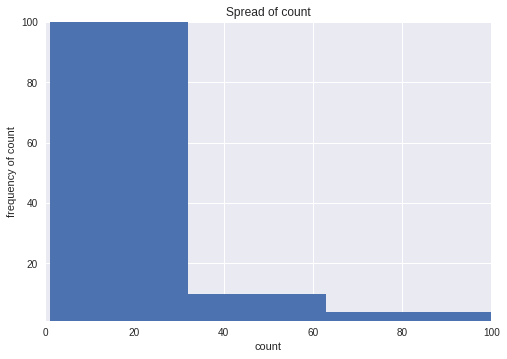

In [60]:
plt.ylim(1,100)
plt.xlim(0,100)
plt.hist(df_prod['count'])
plt.xlabel("count")
plt.ylabel("frequency of count")
plt.title("Spread of count");


Based on the spread observed in the chart above, I decided to look only at production companies that occur more than 20 times in the dataset, so as to get a more reliable average popularity. Next, I will remove all rows where count is less than or equal to 20 and illustrate the results on a bar chart.

In [61]:
df_prod = df_prod[df_prod['count'] > 20]
df_prod.head(5)

,production_company1_x,popularity,count
8,20th Century Fox,0.35,79
259,BBC Films,0.44,61
511,Castle Rock Entertainment,0.49,28
622,Columbia Pictures,0.47,176
623,Columbia Pictures Corporation,0.41,93


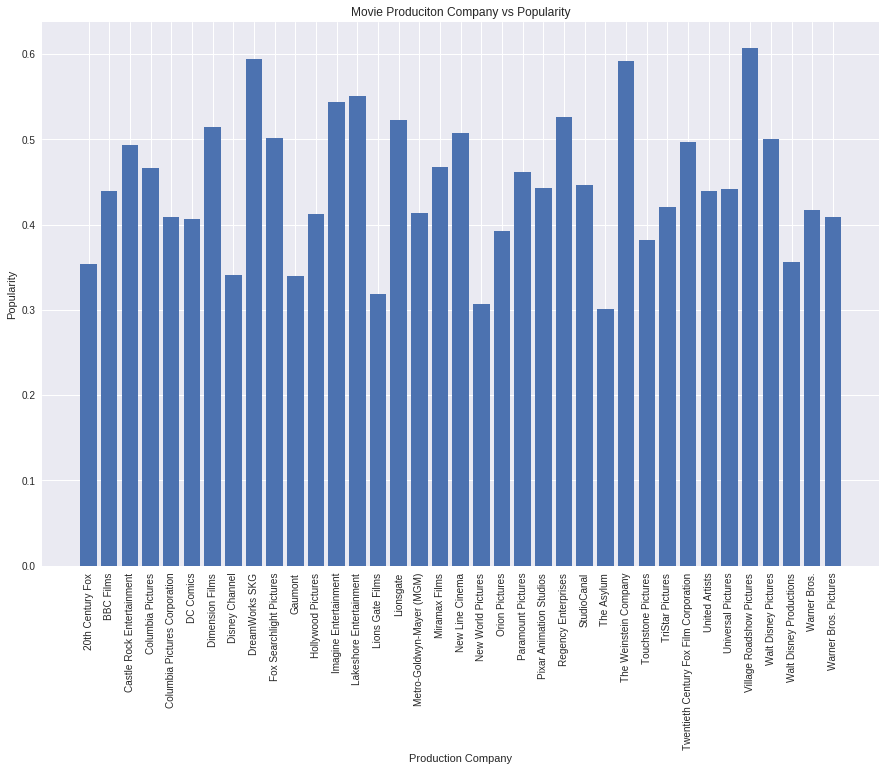

In [62]:
plt.figure(figsize=(15,10))
plt.title('Movie Produciton Company vs Popularity')
plt.xlabel('Production Company')
plt.ylabel('Popularity')
#plt.ylim(ymin= 0.9, ymax=1 )  
x1=df_prod['production_company1_x']
y1=df_prod['popularity']
plt.xticks(np.arange(len(x1)), x1, rotation='vertical')
plt.bar(x1,y1);

In [63]:
df_prod.sort_values('popularity',ascending= False).head(10)

,production_company1_x,popularity,count
2745,Village Roadshow Pictures,0.61,40
804,DreamWorks SKG,0.59,35
2580,The Weinstein Company,0.59,22
1489,Lakeshore Entertainment,0.55,21
1316,Imagine Entertainment,0.54,28
2173,Regency Enterprises,0.53,27
1567,Lionsgate,0.52,25
760,Dimension Films,0.52,35
1848,New Line Cinema,0.51,136
1051,Fox Searchlight Pictures,0.50,56


Based on all production companies that appear more than 20 times in the dataset, the bargraph and executed code shows than the top three production companies associated with the most popular movies are Village Roadshow Pictures, Dreamworks SKG, and The Weinstein Company.

## Which director is used for the most popular moves?

I would now like to determine which director is used in the most popular movies. For this analysis I will look only at the first director given for each movie, in cases where there are more than one directors used in a movie.
Once more I will create a dataframe, this time showing the popularity and count for each director in my dataset.

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8053 entries, 156 to 10865
Data columns (total 12 columns):
popularity              8053 non-null float64
original_title          8053 non-null object
director                8053 non-null object
runtime                 8053 non-null int64
genres                  8053 non-null object
production_companies    8053 non-null object
vote_average            8053 non-null float64
budget_adj              8053 non-null float64
revenue_adj             8053 non-null float64
genres1                 8053 non-null object
production_company1     8053 non-null object
director1               8053 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 817.9+ KB


In [65]:
director=df1.groupby('director1')['revenue_adj'].count().reset_index()
director.head(5)

,director1,revenue_adj
0,FrÃ©dÃ©ric Jardin,1
1,Aaron Hann,1
2,Aaron Katz,1
3,Aaron Keeling,1
4,Aaron Moorhead,1


In [66]:
director1=df1.groupby('director1')['popularity'].mean().reset_index()
director1.head(5)

,director1,popularity
0,FrÃ©dÃ©ric Jardin,0.43
1,Aaron Hann,0.35
2,Aaron Katz,0.27
3,Aaron Keeling,0.08
4,Aaron Moorhead,0.38


In [67]:
df_direct = director1.merge(director, how='outer', left_index=True, right_index=True)
df_direct.drop(['director1_y'],axis = 1,inplace=True)
df_direct.head(5)

,director1_x,popularity,revenue_adj
0,FrÃ©dÃ©ric Jardin,0.43,1
1,Aaron Hann,0.35,1
2,Aaron Katz,0.27,1
3,Aaron Keeling,0.08,1
4,Aaron Moorhead,0.38,1


In [68]:
df_direct.rename(columns={'revenue_adj': 'count'},inplace=True)

Having created the new dataframe, I will first investigate the spread of count in this dataframe using a histogram.

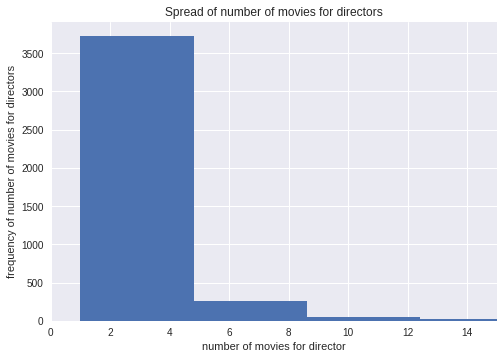

In [69]:
plt.xlim(0,15)
plt.xlabel('number of movies for director')
plt.ylabel('frequency of number of movies for directors')
plt.title('Spread of number of movies for directors')
plt.hist(df_direct['count']);

In [70]:
df_direct.describe()

,popularity,count
count,"4,066.00","4,066.00"
mean,0.36,1.98
std,0.21,2.07
min,0.00,1.00
25%,0.20,1.00
50%,0.33,1.00
75%,0.48,2.00
max,1.00,39.00


Based on the spread in the histogram above, I will only look at rows where count is greater than 8, to get a reliable mean popularity. I will remove all rows with directors that appear less than 8 times in this particular dataframe. I will then create a bar graph to see the popularity of each director.

In [71]:
df_direct = df_direct[df_direct['count'] > 8]
df_direct.head(5)

,director1_x,popularity,count
73,Alan Parker,0.48,11
287,Arthur Hiller,0.26,9
317,Barry Levinson,0.51,16
388,Billy Wilder,0.42,9
394,Blake Edwards,0.44,14


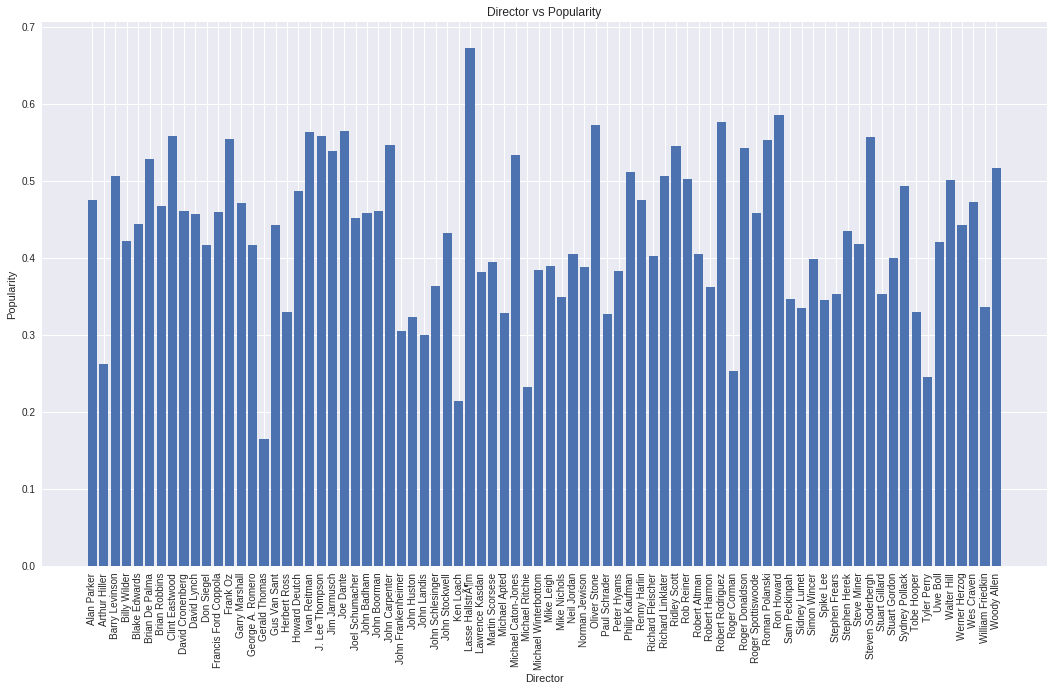

In [72]:
plt.figure(figsize=(18,10))
plt.title('Director vs Popularity')
plt.xlabel('Director')
plt.ylabel('Popularity')
#plt.ylim(ymin= 0.9, ymax=1 )  
x2=df_direct['director1_x']
y2=df_direct['popularity']
plt.xticks(np.arange(len(x2)), x2, rotation='vertical')
plt.bar(x2,y2);

In [73]:
df_direct.sort_values('popularity',ascending= False).head(10)

,director1_x,popularity,count
2305,Lasse HallstrÃ¶m,0.67,9
3370,Ron Howard,0.59,12
3325,Robert Rodriguez,0.58,11
2906,Oliver Stone,0.57,13
1869,Joe Dante,0.57,12
1549,Ivan Reitman,0.56,10
1552,J. Lee Thompson,0.56,10
700,Clint Eastwood,0.56,26
3693,Steven Soderbergh,0.56,14
1238,Frank Oz,0.56,11


Based on the graph and execute code, the three directors most often used for popular movies are Lasse Hallström, Ron Howard, and Robert Rodriguez. The graph was used to get an indication on the relative popularity of each director, and code was used to see the exact mean popularity rating associated with the top directors.

 ## Determining the relationship between revenue and budget

The question I would like to answer here is whether or not high budget movies result in high revenue movies. Is there a positive correlation between budget and revenue? I will look at the relationship between these two using a scatter plot. 
First, i will remove all rows in which the revenue or budget is 0 since realistically budget and revenue cannot be 0.

In [74]:
len(df[df['revenue_adj']==0])

6016

In [75]:
len(df['revenue_adj'])

10866

In [76]:
len(df[df['budget_adj']==0])

5696

In [77]:
len(df['budget_adj'])

10866

In [78]:
df2=df1.loc[(df1['revenue_adj']!=0)]

In [79]:
len(df2[df2['revenue_adj']== 0])

0

In [80]:
df2=df2.loc[(df2['budget_adj']!=0)]

In [81]:
len(df2[df2['budget_adj']< 0])

0

I have now removed all 0 entires and will now plot the graph to see if there are any visible correlations between budget and revenue.

In [82]:
y4=df2['revenue_adj']

In [83]:
x4=df2['budget_adj']

In [84]:
df2['revenue_adj'].describe()

count               2,283.00
mean           63,329,749.61
std            95,864,187.03
min                     2.37
25%             9,742,842.73
50%            31,722,147.56
75%            77,085,675.18
max         1,089,358,138.29
Name: revenue_adj, dtype: float64

In [85]:
df2['budget_adj'].describe()

count               2,283.00
mean           30,927,256.04
std            30,507,360.48
min                     0.97
25%             9,731,517.17
50%            21,540,779.66
75%            42,066,743.31
max           425,000,000.00
Name: budget_adj, dtype: float64

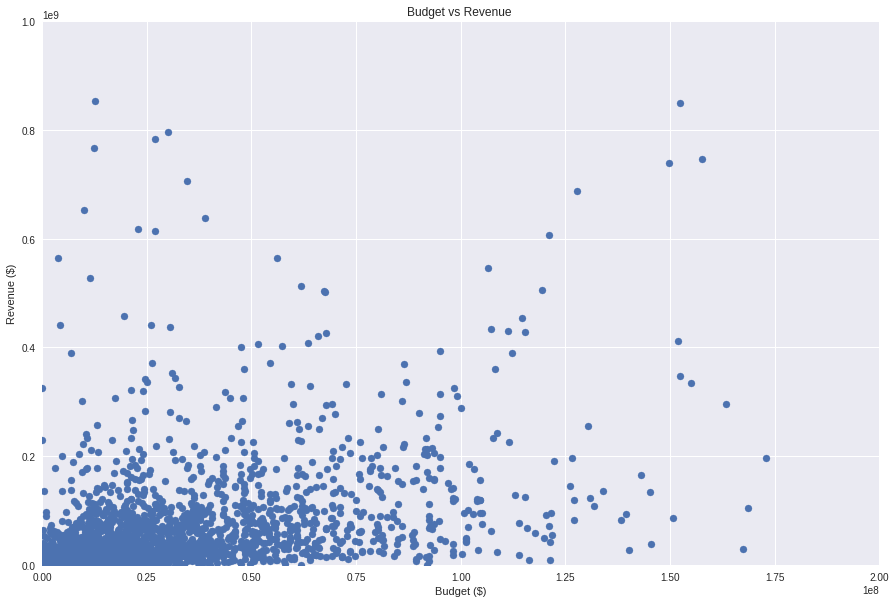

In [86]:
plt.figure(figsize=(15,10))
plt.title('Budget vs Revenue ')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.xlim(0,200000000)
plt.ylim(0,1000000000)
plt.scatter(x4,y4);

From the graph above there doesn't seem to be any visible correlation beween revenue and budget. Must of the data lie between regions 0 and 0.75 (75 000000) on the x-axis and below regions 0 and 0.2 (200 000000) on the y-axis. Next I will look at a smaller section of this data, in these regions where most of the data is located. by doing this I hope to have removed some outliers and be able to identify a trend, if present.

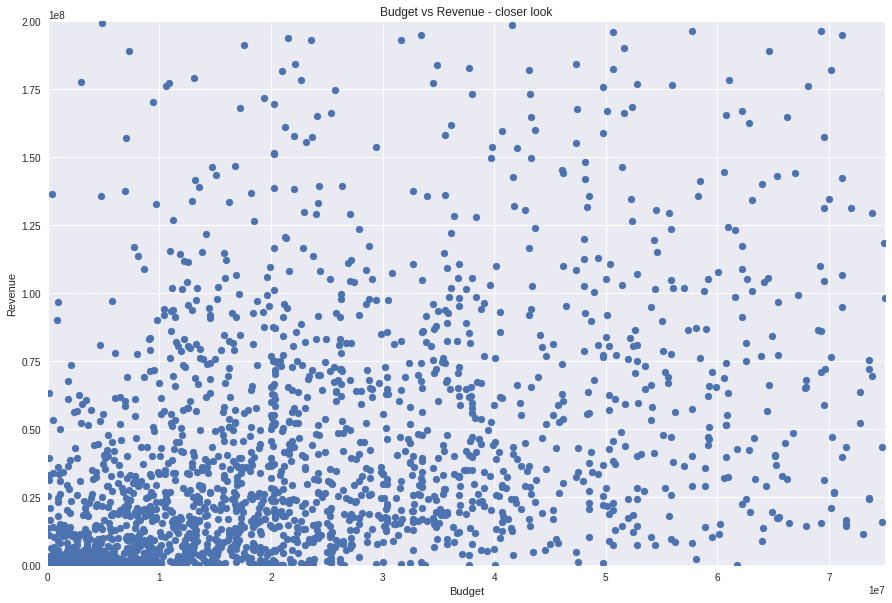

In [87]:
plt.figure(figsize=(15,10))
plt.title('Budget vs Revenue - closer look')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xlim(0,75000000)
plt.ylim(0,200000000)
plt.scatter(x4,y4);

The graph found above also show no correlation between budget and revenue. 
I will now try looking only at the highest revenue and highest budget movies to see if that provides any further insight. i will create two dataframes, one containing the 10 highest revenue movies and their corresponding budgets and the other containing the 10 highest budget movies and their correponding revenues. 

In [90]:
rev_larg=df2.nlargest(10,'revenue_adj')
rev_larg.head()

,popularity,original_title,director,runtime,genres,production_companies,vote_average,budget_adj,revenue_adj,genres1,production_company1,director1
3522,0.76,Transformers: Dark of the Moon,Michael Bay,154,Action|Science Fiction|Adventure,Paramount Pictures|Di Bonaventura Pictures|Has...,6.10,"189,032,618.31","1,089,358,138.29",Action,Paramount Pictures,Michael Bay
1340,0.60,Saturday Night Fever,John Badham,118,Drama|Music,Paramount Pictures|Robert Stigwood Organizatio...,6.30,"12,592,233.61","853,081,315.97",Drama,Paramount Pictures,John Badham
1487,0.81,Transformers: Revenge of the Fallen,Michael Bay,150,Science Fiction|Action|Adventure,Paramount Pictures|DreamWorks SKG|Amblin Enter...,6.00,"152,460,065.12","850,012,865.60",Science Fiction,Paramount Pictures,Michael Bay
10094,0.14,Home Alone,Chris Columbus,103,Comedy|Family,Twentieth Century Fox Film Corporation|Hughes ...,7.00,"30,040,173.73","795,538,358.30",Comedy,Twentieth Century Fox Film Corporation,Chris Columbus
10601,0.86,The Sting,George Roy Hill,129,Comedy|Crime|Drama,Universal Pictures,7.70,"27,011,377.68","783,901,253.28",Comedy,Universal Pictures,George Roy Hill


In [91]:
budget_larg=df2.nlargest(10,'budget_adj')
budget_larg.head()

,popularity,original_title,director,runtime,genres,production_companies,vote_average,budget_adj,revenue_adj,genres1,production_company1,director1
2244,0.25,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,6.40,"425,000,000.00","11,087,569.00",Adventure,Boram Entertainment Inc.,Sngmoo Lee
6883,0.16,X-Men: The Last Stand,Brett Ratner,104,Adventure|Action|Science Fiction|Thriller,20th Century Fox,6.20,"227,150,523.24","253,499,999.08",Adventure,20th Century Fox,Brett Ratner
10443,0.80,Cleopatra,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,6.30,"221,544,381.15","411,190,358.71",Drama,Twentieth Century Fox Film Corporation,Joseph L. Mankiewicz
3522,0.76,Transformers: Dark of the Moon,Michael Bay,154,Action|Science Fiction|Adventure,Paramount Pictures|Di Bonaventura Pictures|Has...,6.10,"189,032,618.31","1,089,358,138.29",Action,Paramount Pictures,Michael Bay
6643,0.83,Poseidon,Wolfgang Petersen,99,Adventure|Action|Drama|Thriller,Virtual Studios|Next Entertainment|Warner Bros...,5.30,"173,067,065.33","196,512,046.39",Adventure,Virtual Studios,Wolfgang Petersen


I will now plot these two dataframes to see how they compare to each other and if there are any visibily trends.

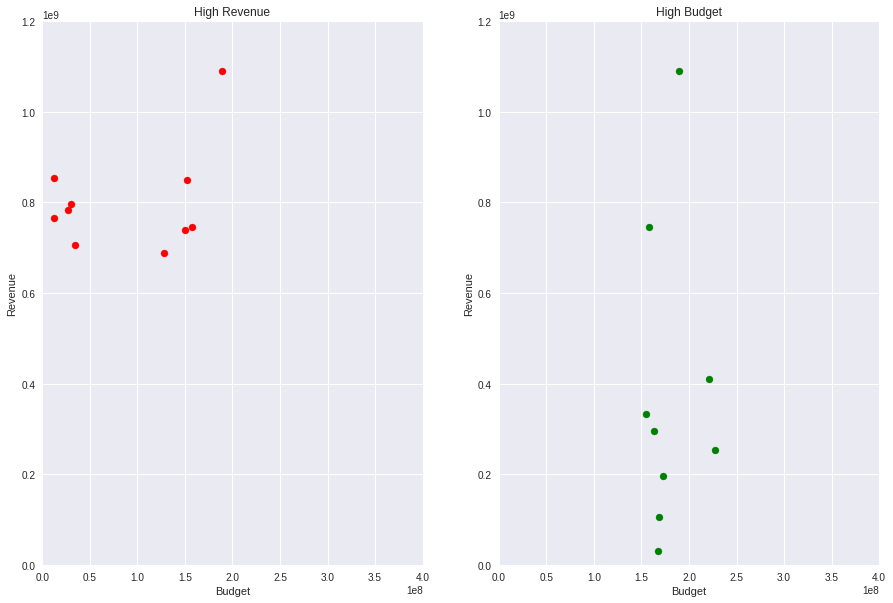

In [92]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title('High Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.ylim(0,1200000000)
plt.xlim(0,400000000)
plt.scatter(rev_larg['budget_adj'],rev_larg['revenue_adj'], color='red')
plt.subplot(122)
plt.title('High Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.ylim(0,1200000000)
plt.xlim(0,400000000)
plt.scatter(budget_larg['budget_adj'],budget_larg['revenue_adj'], color='green');

In [93]:
df2['budget_adj'].median()

21540779.657749303

In [94]:
df2['revenue_adj'].median()

31722147.564220503

In the cells above I looked at the 10 highest revenues and their corresponding budgets as well as the 10 highest budgets and their corresponding revenues. I plotted two graphs using these values, with the red dots indicating the high revenue dataset and the green dots indicating the high budget dataset. From this plot and the table describing this data, one can see that the highest revenue movie was also one of the highest budget movies. <br/>
However some of the highest budget movies had much lower revenues than the 10 highest revenue movies. This is clear when looking at the median revenue calculated above and comparing it to some of the revenues corresponding to the 10 highest budgets. Similarly, some of the highest revenue movies had much smaller budgets than the 10 highest budget movies. 

## Is budget directly proportional to average vote?

Do high budget movies get higher votes on average? I will use a scatter plot to see the relationship between these two factors.

In [95]:
y4=df1['budget_adj']
y4.head()

156          13,799,993.93
157          16,559,992.71
158                   0.00
159             579,617.22
160          11,039,995.14
Name: budget_adj, dtype: float64

In [97]:
x4=df1['vote_average']
x4.head()

156                   6.00
157                   5.50
158                   7.20
159                   7.70
160                   5.60
Name: vote_average, dtype: float64

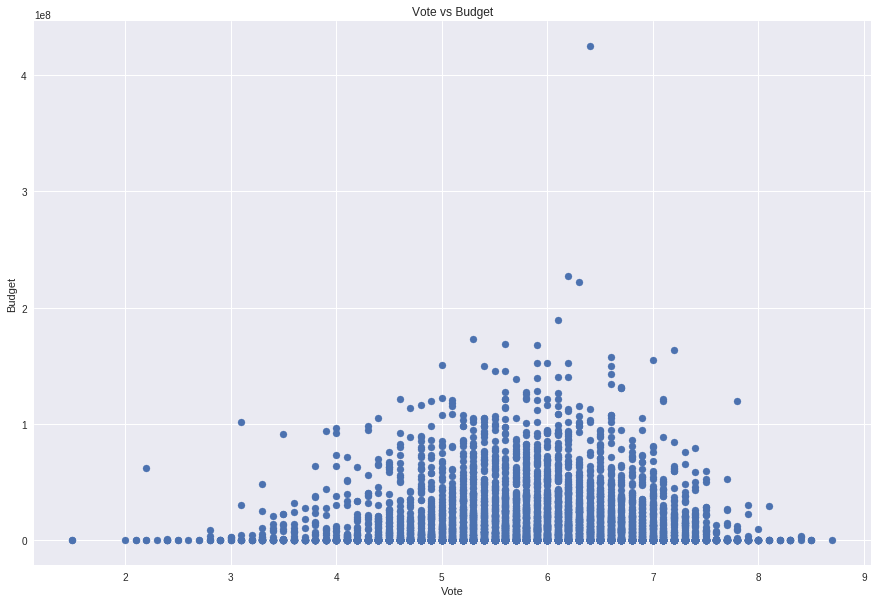

In [100]:
plt.figure(figsize=(15,10))
plt.title('Vote vs Budget')
plt.xlabel('Vote')
plt.ylabel('Budget')
plt.scatter(x4,y4);

From the graph it seems that the highest budget movies did not, consistently get the highest votes. There were some low budget movies that received the highest votes - higher than 8. It does however appear that movies with a relatively high vote rangeing from 5 to 7 usually have higer budgets than movies where the average vote is less than 5. From the graph one can also see than the highest budget movie received a relatively high vote, between 6 and 7.

<a id='conclusions'></a>
## Conclusions


This report analysed TMDb data in order to answer the following questions:

1. Which genre of movie is most popular?
2. Which production company produces the most popular movies?
3. Which director is used in the most popular moves?
4. Is revenue directly proportional to budget?
5. Is revenue directly proportional to average vote?

For questions 1 to 3 I found that the most popular genre was animation, the most popular production company was Village Roadshow Pictures, and the most popular director was Lasse Hallström.
It is important to note that in all three of these cases I filtered the data based on count, choosing a minimum count each time which I believed would ensure that I would get a reliable mean. <br/> Earlier on whilst cleaning the data I also removed all rows in which popularity rating exceeded 1, thereby assuming that those inputs were incorrect.Furthermore I only looked at the first row entry for 'genre','produciton company' and 'director' columns, assuming in the process that the first entry was the most important one. These assumptions and changes affected the outcomes when using this data and hence also my findings.

I could not find a clear and consistent correlation between budget and revenue. From visualizations it seems that these two are independant. 

Comparing revenue to average vote, I discovered that the highest budget movies did not, consistently get the highest votes. There were some low budget movies that received the highest votes. It does however appear that movies with a relatively high vote rangeing from 5 to 7 usually have higer budgets than movies where the average vote is less than 5. 

There were limitations to this dataset, which had an impact on the outcome of the analysis. 
For example, there were almost 1060 rows that contain one or more NULL entry. I had to remove all of these rows, and by doing so had to remove almost 10% of the data. The accuracy of conclusions drawn from a dataset is affected by the completeness of that data, therefore this had an impact on the conclusions that could be drawn from this dataset.

Furthermore, the assumptions I made may have limited my analysis. For example, I assumed that for a production company to be considered popular it had to appear in the dataset more than 20 times and have the highest mean. This assumption influeced the results in that it removed a lot of data. There may have been popular production companies that appear less than twenty times in this particular dataset, but may have in reality producted more than 20 movies, this can also be seen as a limitation in the dataset. I also assumed that the first entry on each row for the genre, production company, and director columns were the most important. I therefore assumed that they were entered in order of importance. It could have been that they were entered ramdomly, in which case I would have been wrong in my assumption and it would have had a negative affect on my analysis.

There are many more investigations that can be done one this data. For example, one can look at the relationship between cast and popularity of a movie. You can also look at more than 1 entry in the genre, production company, and director columns when finding the most popular in each of these. 
